In [22]:
import pickle
import numpy as np
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [23]:
k_n = 'k3'

stacking_strategies = [
    "igcngru_features",
    "idarkvec"]

In [24]:
labels = ['mirai',
                  'unk_bruteforcer',
                  'unk_spammer',
                  'shadowserver',
                  'driftnet',
                  'internetcensus',
                  'censys',
                  'rapid7',
                  'onyphe',
                  'netsystems',
                  'shodan',
                  'unk_exploiter',
                  'securitytrails',
                  'intrinsec',
                  'unknown']

labels.sort()

In [25]:
strats_posfix = '-'.join(sorted(stacking_strategies))

In [26]:
with open(f"reports/stacking-v-0.3/{strats_posfix}/{k_n}.pkl", "rb") as fd:
    stacking_reporte = pickle.load(fd)

In [27]:
def __plot_cm(y, preds):
    
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    preds_enc = le.transform(preds)
    
    cm = confusion_matrix(y_enc, preds_enc, normalize='true')
    #cm = np.trunc(1000 * cm) / 1000
    sns.set(font_scale=1.2)  # Adjust font scale for better visibility
    sns.heatmap(cm,
                annot=True,
                annot_kws={"size": 12},
                xticklabels=le.classes_,
                yticklabels=le.classes_,
                square=False)
    
def plot_cm(y, preds, labels):
    
    cm = confusion_matrix(y, preds, labels=labels, normalize='true')
    #cm = np.trunc(1000 * cm) / 1000
    sns.set(font_scale=1.2)  # Adjust font scale for better visibility
    sns.heatmap(cm,
                annot=True,
                annot_kws={"size": 12},
                xticklabels=labels,
                yticklabels=labels,
                square=False)

def get_y_preds(stacking_reporte, day):
    
    y, preds = [], []
    for fold in stacking_reporte[day]:
        y.append(
            stacking_reporte[day][fold]['y']
        )
        preds.append(
            stacking_reporte[day][fold]['preds']
        )

    y = np.hstack(y)
    preds = np.hstack(preds)
    
    return y, preds

Text(0.5, 1.0, 'Day: 20211221')

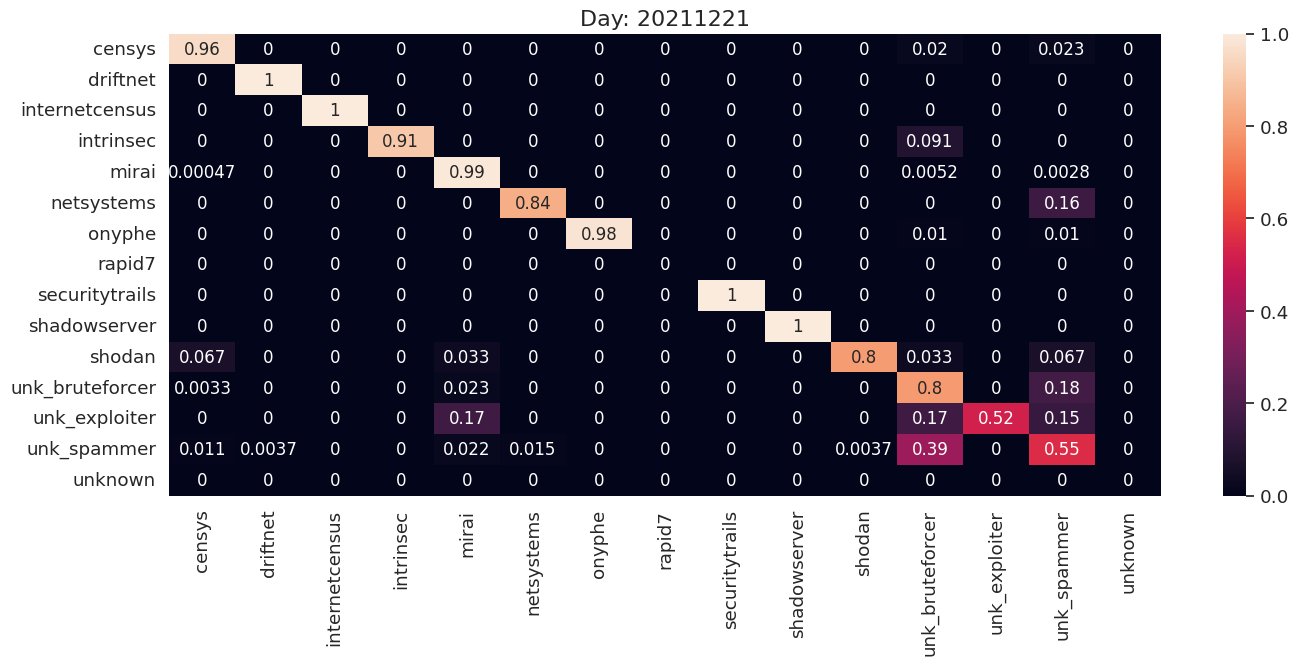

In [28]:
plt.figure(figsize=(16, 6))
day = "20211221"
y, preds = get_y_preds(stacking_reporte, day)
plot_cm(y, preds, labels)
plt.title(f"Day: {day}", fontsize=16)

TypeError: plot_cm() missing 1 required positional argument: 'labels'

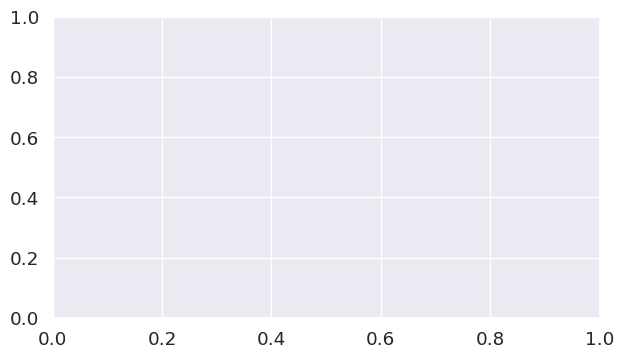

In [29]:
plt.figure(figsize=(24, 18))
for plot_idx, day in enumerate(stacking_reporte):
    
    y, preds = get_y_preds(stacking_reporte, day)
    
    plt.subplot(4, 3, plot_idx + 1)
    plot_cm(y, preds)
    plt.title(f"Day: {day}", fontsize=16)

In [ ]:
np.sum(cm, axis=1)

array([0.99, 0.99, 1.  , 1.  , 1.01, 0.93, 1.  , 1.  , 1.  , 0.96, 0.9 ,
       1.01, 1.09])